In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_df = pd.read_csv("data1/data.csv")
data_df.head()

,img_path,command,speed,turn
0,images/0.jpg,0,60,0
1,images/1.jpg,0,60,0
2,images/2.jpg,0,60,0
3,images/3.jpg,0,60,0
4,images/4.jpg,0,60,0


In [3]:
data_df["img_path"] = data_df.apply(lambda row: "data1/" + row["img_path"], axis=1)
print(data_df.head())
print(data_df.shape)

             img_path  command  speed  turn
0  data1/images/0.jpg        0     60     0
1  data1/images/1.jpg        0     60     0
2  data1/images/2.jpg        0     60     0
3  data1/images/3.jpg        0     60     0
4  data1/images/4.jpg        0     60     0
(2431, 4)


In [4]:
tmp_df = pd.read_csv("data2/data.csv")
tmp_df.head()

,img_path,command,speed,turn
0,images/0.jpg,0,60,0
1,images/1.jpg,0,60,0
2,images/2.jpg,0,60,0
3,images/3.jpg,0,60,0
4,images/4.jpg,0,60,0


In [5]:
tmp_df["img_path"] = tmp_df.apply(lambda row: "data2/" + row["img_path"], axis=1)
print(tmp_df.head())
print(tmp_df.shape)

             img_path  command  speed  turn
0  data2/images/0.jpg        0     60     0
1  data2/images/1.jpg        0     60     0
2  data2/images/2.jpg        0     60     0
3  data2/images/3.jpg        0     60     0
4  data2/images/4.jpg        0     60     0
(2226, 4)


In [6]:
data_df = pd.concat([data_df, tmp_df], axis=0, ignore_index=True)
print(data_df.head())
print(data_df.shape)

             img_path  command  speed  turn
0  data1/images/0.jpg        0     60     0
1  data1/images/1.jpg        0     60     0
2  data1/images/2.jpg        0     60     0
3  data1/images/3.jpg        0     60     0
4  data1/images/4.jpg        0     60     0
(4657, 4)


In [7]:
#移除command == 0(不動) or == 2(後退)
fliter1 = (data_df["command"] != 0) 
fliter2 = (data_df["command"] != 2)
data_df = data_df[(fliter1 & fliter2)]
data_df.shape

(4148, 4)

In [8]:
def read_img(row):
    if (pd.notnull(row["img_path"])):
        row["img_data"] = cv2.imread("{}".format(row["img_path"]))
    else:
        print("something_NULL")
    return row

In [9]:
data_df["img_data"] = 0
data_df = data_df.apply(read_img, axis=1)
data_df.head()

,img_path,command,speed,turn,img_data
26,data1/images/26.jpg,1,60,0,"[[[79, 87, 86], [82, 90, 89], [82, 90, 89], [8..."
27,data1/images/27.jpg,1,60,0,"[[[82, 93, 91], [76, 87, 85], [76, 87, 85], [7..."
28,data1/images/28.jpg,1,60,0,"[[[84, 90, 89], [85, 91, 90], [84, 90, 89], [8..."
29,data1/images/29.jpg,3,100,1,"[[[82, 88, 87], [82, 88, 87], [80, 86, 85], [7..."
30,data1/images/30.jpg,3,100,1,"[[[80, 86, 85], [83, 89, 88], [82, 88, 87], [7..."


In [10]:
#img to gray
data_df["img_data"] = data_df.apply(lambda row: cv2.cvtColor(row["img_data"], cv2.COLOR_BGR2GRAY), axis=1)
data_df.head()

,img_path,command,speed,turn,img_data
26,data1/images/26.jpg,1,60,0,"[[86, 89, 89, 88, 89, 89, 83, 75, 43, 60, 82, ..."
27,data1/images/27.jpg,1,60,0,"[[91, 85, 85, 86, 86, 91, 88, 74, 41, 59, 81, ..."
28,data1/images/28.jpg,1,60,0,"[[89, 90, 89, 87, 89, 91, 84, 72, 40, 56, 85, ..."
29,data1/images/29.jpg,3,100,1,"[[87, 87, 85, 84, 87, 89, 82, 71, 44, 60, 79, ..."
30,data1/images/30.jpg,3,100,1,"[[85, 88, 87, 84, 88, 91, 84, 72, 40, 58, 81, ..."


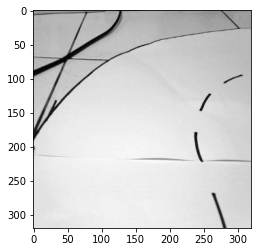

In [11]:
plt.imshow(data_df["img_data"][26], cmap="gray")

In [12]:
#縮小img數值範圍
data_df["img_data"] = data_df.apply(lambda row: row["img_data"] / 255, axis=1)
data_df.head()

,img_path,command,speed,turn,img_data
26,data1/images/26.jpg,1,60,0,"[[0.33725490196078434, 0.34901960784313724, 0...."
27,data1/images/27.jpg,1,60,0,"[[0.3568627450980392, 0.3333333333333333, 0.33..."
28,data1/images/28.jpg,1,60,0,"[[0.34901960784313724, 0.35294117647058826, 0...."
29,data1/images/29.jpg,3,100,1,"[[0.3411764705882353, 0.3411764705882353, 0.33..."
30,data1/images/30.jpg,3,100,1,"[[0.3333333333333333, 0.34509803921568627, 0.3..."


In [13]:
data_df.shape

(4148, 5)

In [14]:
#檢查label數量
data_df["command"].value_counts()

1    1793
3    1438
4     917
Name: command, dtype: int64

In [15]:
x_train_img = data_df["img_data"].to_numpy()
x_train_speed = data_df["speed"].to_numpy()
y_train_command = data_df["command"].to_numpy()
y_train_turn = data_df["turn"].to_numpy()
print(x_train_img.shape)
print(x_train_img)
print(x_train_speed.shape)
print(y_train_command.shape)
print(y_train_turn.shape)

(4148,)
[array([[0.3372549 , 0.34901961, 0.34901961, ..., 0.32941176, 0.32156863,
        0.31372549],
       [0.35686275, 0.36470588, 0.36078431, ..., 0.35686275, 0.35686275,
        0.35294118],
       [0.3372549 , 0.35294118, 0.35294118, ..., 0.36862745, 0.37254902,
        0.37647059],
       ...,
       [0.54509804, 0.54117647, 0.54117647, ..., 0.5254902 , 0.5254902 ,
        0.5254902 ],
       [0.54509804, 0.54509804, 0.54117647, ..., 0.5254902 , 0.52941176,
        0.52941176],
       [0.54901961, 0.54509804, 0.54509804, ..., 0.52941176, 0.53333333,
        0.53333333]])
 array([[0.35686275, 0.33333333, 0.33333333, ..., 0.31764706, 0.31764706,
        0.32156863],
       [0.36862745, 0.35294118, 0.35686275, ..., 0.34901961, 0.35294118,
        0.35686275],
       [0.34117647, 0.34117647, 0.35294118, ..., 0.36470588, 0.36862745,
        0.37647059],
       ...,
       [0.54509804, 0.54509804, 0.54509804, ..., 0.5254902 , 0.5254902 ,
        0.52156863],
       [0.54509804, 0.545

In [16]:
tmp = []
for i in (x_train_img):
    tmp.append(np.array(i))
x_train_img = np.array(tmp)
print(x_train_img[0])
print(x_train_img.shape)

[[0.3372549  0.34901961 0.34901961 ... 0.32941176 0.32156863 0.31372549]
 [0.35686275 0.36470588 0.36078431 ... 0.35686275 0.35686275 0.35294118]
 [0.3372549  0.35294118 0.35294118 ... 0.36862745 0.37254902 0.37647059]
 ...
 [0.54509804 0.54117647 0.54117647 ... 0.5254902  0.5254902  0.5254902 ]
 [0.54509804 0.54509804 0.54117647 ... 0.5254902  0.52941176 0.52941176]
 [0.54901961 0.54509804 0.54509804 ... 0.52941176 0.53333333 0.53333333]]
(4148, 320, 320)


In [17]:
# x_train_speed = tf.keras.utils.to_categorical(x_train_speed, num_classes=3)
y_train_command = tf.keras.utils.to_categorical(y_train_command)
y_train_turn = tf.keras.utils.to_categorical(y_train_turn)
print(x_train_speed[0], x_train_speed.shape)
print(y_train_command[0], y_train_command.shape)
print(y_train_turn[0], y_train_turn.shape)

60 (4148,)
[0. 1. 0. 0. 0.] (4148, 5)
[1. 0. 0.] (4148, 3)


In [18]:
speed_dict = {
    40: 0,
    60: 1, 
    100: 2
}
print(x_train_speed)

[ 60  60  60 ... 100 100 100]


In [19]:
test = []
for i in range(x_train_speed.shape[0]):
    x_train_speed[i] = speed_dict[x_train_speed[i]]
print(x_train_speed)

[1 1 1 ... 2 2 2]


In [20]:
x_train_speed = tf.keras.utils.to_categorical(x_train_speed)
print(x_train_speed)
print(x_train_speed.shape)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(4148, 3)


In [21]:
print(x_train_img[0].shape)

(320, 320)


In [22]:
#以固定順序打亂數據
np.random.seed(3)
np.random.shuffle(x_train_img)
np.random.seed(3)
np.random.shuffle(x_train_speed)
np.random.seed(3)
np.random.shuffle(y_train_command)
np.random.seed(3)
np.random.shuffle(y_train_turn)

In [23]:
#img to 4D
x_train_img = np.reshape(x_train_img, (x_train_img.shape[0], x_train_img.shape[1], x_train_img.shape[2], 1))
print(x_train_img.shape)

(4148, 320, 320, 1)


In [24]:
from sklearn.model_selection import train_test_split
x_train_img, x_test_img, y_train_command, y_test_command = train_test_split(x_train_img, y_train_command, random_state = 3)
x_train_speed, x_test_speed, y_train_turn, y_test_turn = train_test_split(x_train_speed, y_train_turn, random_state = 3)
print(x_train_img.shape)
print(x_test_img.shape)
print(x_train_speed.shape)
print(x_test_speed.shape)
print(y_train_command.shape)
print(y_test_command.shape)
print(y_train_turn.shape)
print(y_test_turn.shape)

(3111, 320, 320, 1)
(1037, 320, 320, 1)
(3111, 3)
(1037, 3)
(3111, 5)
(1037, 5)
(3111, 3)
(1037, 3)


In [25]:
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_visible_devices(gpus[0], "GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)

In [26]:
#建多輸入多(單)輸出模型
input_img = tf.keras.Input(shape=(x_train_img.shape[1], x_train_img.shape[2], 1), name="input_img")
input_speed = tf.keras.Input(shape=(x_train_speed.shape[1], ), name="input_speed")
x1 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=2, padding="same")(input_img)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.ReLU()(x1)
x1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), padding="same")(x1)
x1 = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, padding="same")(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.ReLU()(x1)
x1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), padding="same")(x1)
x1 = tf.keras.layers.ReLU()(x1)
x1 = tf.keras.layers.Flatten()(x1)
x1 = tf.keras.layers.Dense(64, activation="relu")(x1)
x1 = tf.keras.layers.Dense(32, activation="relu")(x1)
x1 = tf.keras.layers.Dropout(0.25)(x1)
x1 = tf.keras.layers.Dense(16, activation="relu")(x1)

x2 = tf.keras.layers.Dense(16, activation="relu")(input_speed)
combine = tf.keras.layers.concatenate([x1, x2])
combine = tf.keras.layers.Dense(16, activation="relu")(combine)
combine = tf.keras.layers.Dense(16, activation="relu")(combine)

output_command = tf.keras.layers.Dense(8, activation="relu")(combine)
output_command = tf.keras.layers.Dense(5)(output_command)
output_command = tf.keras.layers.Softmax(name="output_command")(output_command)
output_turn = tf.keras.layers.Dense(3)(combine)
output_turn = tf.keras.layers.Softmax(name="output_turn")(output_turn)

model = tf.keras.Model(inputs=[input_img, input_speed], outputs = [output_command, output_turn])
# model = tf.keras.Model(inputs=[input_img, input_speed], outputs = output_command)

class CNN(object):
    def init(self):
        super(CNN, self).__init__()
        self.x1_cov1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid")
        self.relu = tf.keras.layers.ReLU()
        self.x1_cov2 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid")
        self.flatten = tf.keras.layers.Flatten()
        self.x1_line1 = tf.keras.layers.Dense(64)
        self.x1_line2 = tf.keras.layers.Dense(16)
        self.x2_line1 = tf.keras.layers.Dense(16)
        self.combine = tf.keras.layers.concatenate()
        self.output_command = tf.keras.layers.Dense(5)
        self.output_turn = tf.keras.layers.Dense(3)
        self.softmax = tf.keras.layers.Softmax()
    def creat_model(self, Input1, Input2):
        Input1 = tf.keras.Input(Input1.shape)
        Input2 = tf.keras.Input(Input2.shape)
        x1 = self.x1_cov1(Input1)
        x1 = self.relu(x1)
        x1 = self.x1_cov2(x1)
        x1 = self.relu(x1)
        x1 = self.flatten(x1)
        x1 = self.x1_line1(x1)
        x1 = self.x1_line2(x1)
        x2 = self.x2_line1(Input2)
        x2 = self.relu(x2)
        combine = self.combine([x1, x2])
        output_command = self.output_command(combine)
        output_command = self.softmax(output_command)
        output_turn = self.output_turn(combine)
        output_turn = self.softmax(output_turn)
        model = tf.keras.Model(input=[Input1, Input2])
        return [output_command, output_turn]

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 320, 320, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 160, 160, 16) 416         input_img[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 160, 160, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 160, 160, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

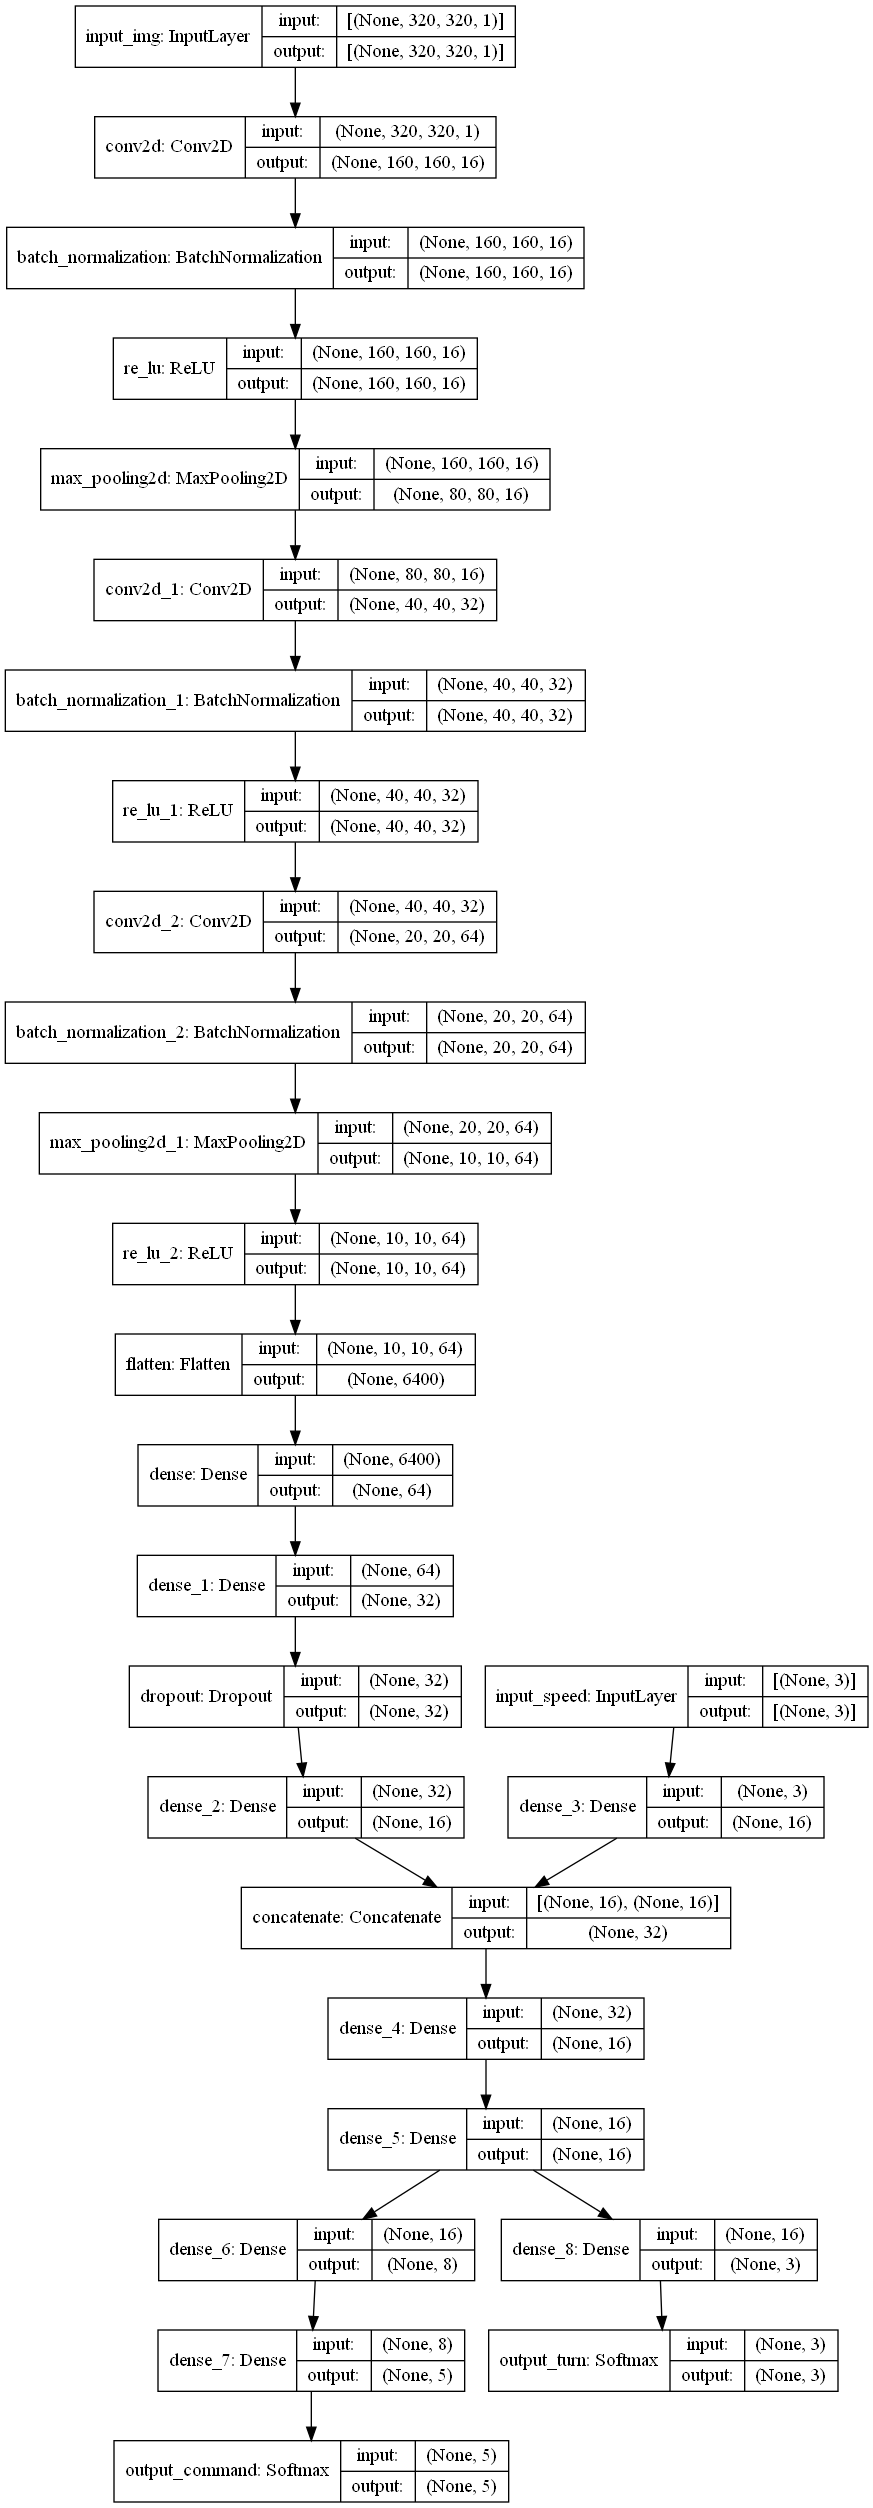

In [28]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

In [29]:
lr_function = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=3,
    verbose=1,
)

In [30]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = "categorical_crossentropy",
    metrics=["accuracy"]
)

In [31]:
history = model.fit(x=[x_train_img, x_train_speed], y=[y_train_command, y_train_turn], 
batch_size=32, validation_split=0.2, 
epochs=50, verbose=1, callbacks=lr_function)

Epoch 1/50
78/78 [==============================] - 13s 40ms/step - loss: 1.9632 - output_command_loss: 0.9846 - output_turn_loss: 0.9786 - output_command_accuracy: 0.5916 - output_turn_accuracy: 0.5129 - val_loss: 2.0422 - val_output_command_loss: 1.0750 - val_output_turn_loss: 0.9672 - val_output_command_accuracy: 0.7014 - val_output_turn_accuracy: 0.6533
Epoch 2/50
78/78 [==============================] - 2s 25ms/step - loss: 1.3140 - output_command_loss: 0.5143 - output_turn_loss: 0.7997 - output_command_accuracy: 0.8103 - output_turn_accuracy: 0.6117 - val_loss: 1.5143 - val_output_command_loss: 0.7292 - val_output_turn_loss: 0.7851 - val_output_command_accuracy: 0.7095 - val_output_turn_accuracy: 0.6356
Epoch 3/50
78/78 [==============================] - 2s 26ms/step - loss: 0.9813 - output_command_loss: 0.3264 - output_turn_loss: 0.6549 - output_command_accuracy: 0.8830 - output_turn_accuracy: 0.6620 - val_loss: 1.3045 - val_output_command_loss: 0.5700 - val_output_turn_loss: 0.

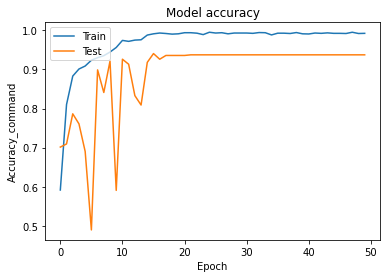

In [32]:
plt.plot(history.history["output_command_accuracy"])
plt.plot(history.history["val_output_command_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy_command")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

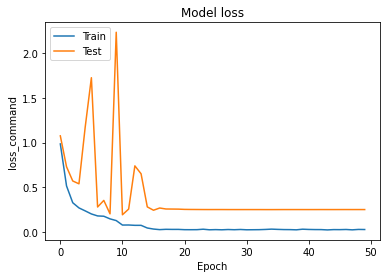

In [33]:
plt.plot(history.history["output_command_loss"])
plt.plot(history.history["val_output_command_loss"])
plt.title("Model loss")
plt.ylabel("loss_command")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

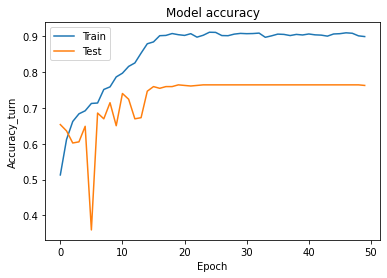

In [34]:
plt.plot(history.history["output_turn_accuracy"])
plt.plot(history.history["val_output_turn_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy_turn")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

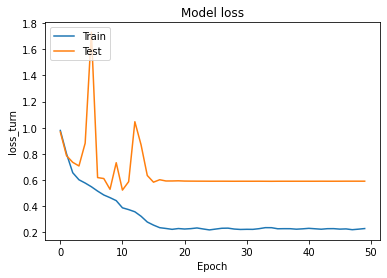

In [35]:
plt.plot(history.history["output_turn_loss"])
plt.plot(history.history["val_output_turn_loss"])
plt.title("Model loss")
plt.ylabel("loss_turn")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

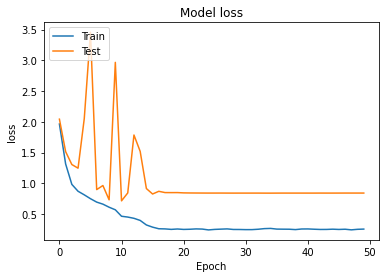

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [37]:
score = model.evaluate([x_test_img, x_test_speed], [y_test_command, y_test_turn], verbose=1)

33/33 [==============================] - 1s 15ms/step - loss: 0.8854 - output_command_loss: 0.2486 - output_turn_loss: 0.6367 - output_command_accuracy: 0.9325 - output_turn_accuracy: 0.7329


In [39]:
tf.saved_model.save(model, "model")

INFO:tensorflow:Assets written to: model\assets


In [40]:
model.save("model_keras.h5")